# **License Plate Detection Using Computer Vision and YOLO + OCR**

## *Importing Require Libraries*

In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install pytesseract
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 13.2 MB/s eta 0:00:00
   ━━━

## *Read & Preprocess Image*

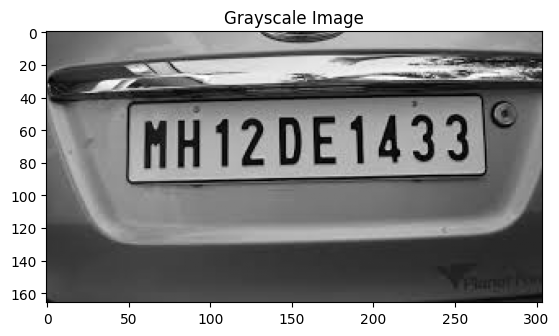

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/car.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

## *License Plate Detection on Contour-Based*

Detected Plate


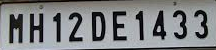

In [ ]:
from google.colab.patches import cv2_imshow # Import cv2_imshow

edged = cv2.Canny(blur, 50, 200)
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plate = None
for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    if len(approx) == 4:
        plate = approx
        break

if plate is not None:
    x, y, w, h = cv2.boundingRect(plate)
    plate_img = img[y:y+h, x:x+w]
    print("Detected Plate")
    cv2_imshow(plate_img)

## *Plate Preprocessing*

Thresholded Plate


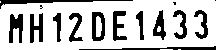

In [ ]:
gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray_plate, 0, 255,
                       cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

print("Thresholded Plate")
cv2_imshow(thresh)

## *OCR (Text Recognition)*

In [ ]:
import pytesseract

text = pytesseract.image_to_string(
    thresh,
    config='--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
)

print("License Plate Number:", text)

License Plate Number: MH12DE1433



Final Output


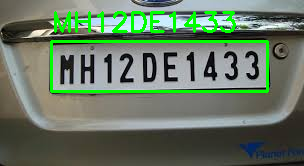

In [ ]:
cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv2.putText(img, text.strip(), (x,y-10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

print("Final Output")
cv2_imshow(img)

## Detect license plate using YOLO + OCR

### *Download Dataset (YOLOv8 Format)*
Roboflow: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/11

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="yv2nvOw1AYSGOVCOeGak") # use your Own API Key of Roboflow
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(11).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov8:: 100%|██████████| 20262/20262 [00:02<00:00, 6985.72it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### *Train Model using YOLOv8*

yolov8n is the smallest and fastest model in the YOLOv8 family. It's designed for speed and low resource usage, making it ideal for lightweight or real-time applications.

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano model (fast & light)

model.train(
    data="/content/License-Plate-Recognition-11/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    name="license_plate_yolo"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=license_plate_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2676739e20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.val()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 788.6±347.9 MB/s, size: 20.2 KB)
val: Scanning /content/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2048/2048 3.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 7.4it/s 17.4s
                   all       2048       2195      0.981      0.923      0.965      0.681
Speed: 0.9ms preprocess, 2.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2626319970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Test on Image

In [ ]:
model = YOLO("/content/runs/detect/license_plate_yolo/weights/best.pt")

image_path = "/content/License-Plate-Recognition-11/test/images"
results = model.predict(source=image_path, conf=0.4, save=True)

print("Inference complete!")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1020 /content/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 480x640 2 License_Plates, 40.1ms
image 2/1020 /content/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 576x640 2 License_Plates, 39.9ms
image 3/1020 /content/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 480x640 1 License

Test your Own image

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

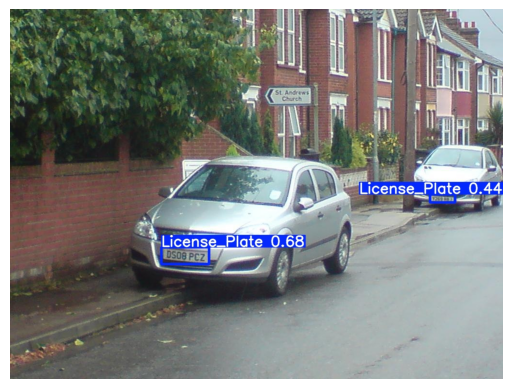

In [ ]:
# Corrected path to an example predicted image
img = cv2.imread("/content/runs/detect/predict/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")


In [ ]:
model = YOLO("/content/runs/detect/license_plate_yolo/weights/best.pt")

model.predict(
    source="/content/car.jpg",   # upload your own image
    conf=0.4,
    save=True
)


image 1/1 /content/car.jpg: 352x640 1 License_Plate, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'License_Plate'}
 obb: None
 orig_img: array([[[ 80,  92,  96],
         [ 80,  92,  96],
         [ 81,  93,  97],
         ...,
         [145, 145, 133],
         [141, 141, 129],
         [138, 138, 126]],
 
        [[ 80,  92,  96],
         [ 80,  92,  96],
         [ 81,  93,  97],
         ...,
         [143, 143, 131],
         [143, 143, 131],
         [143, 143, 131]],
 
        [[ 80,  92,  96],
         [ 80,  92,  96],
         [ 81,  93,  97],
         ...,
         [139, 142, 127],
         [142, 145, 130],
         [145, 148, 133]],
 
        ...,
 
        [[ 52,  56,  57],
         [ 60,  65,  66],
         [ 69,  74,  75],
         ...,
         [ 15,  17,  17],
         [ 16,  18,  18],
         [ 16,  18,  18]],
 
        [[ 19,  22,  26],
         [ 32,  37,  40],
         [ 50,  55,  58],
         ...,
         [ 

"**model.export(format="onnx")**" converts a trained YOLO model from PyTorch into ONNX format, making it framework-independent and suitable for high-performance, cross-platform deployment.

In [ ]:
model.export(format="onnx")

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/license_plate_yolo/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 147ms
Prepared 6 packages in 7.57s
Installed 6 packages in 261ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.0
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.80

requirements: AutoUpdate success ✅ 8.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.0 opset 22...


Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 


ONNX: slimming with onnxslim 0.1.80...
ONNX: export success ✅ 11.9s, saved as '/content/runs/detect/license_plate_yolo/weights/best.onnx' (11.7 MB)

Export complete (12.3s)
Results saved to /content/runs/detect/license_plate_yolo/weights
Predict:         yolo predict task=detect model=/content/runs/detect/license_plate_yolo/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/license_plate_yolo/weights/best.onnx imgsz=640 data=/content/License-Plate-Recognition-11/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/license_plate_yolo/weights/best.onnx'

### YOLO + Tesseract Code

This code uses YOLOv8 to detect license plates in images and Tesseract OCR to recognize alphanumeric characters from the detected plate regions, combining object detection with optical character recognition for an end-to-end ANPR system.


0: 352x640 1 License_Plate, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)
YOLO + OCR


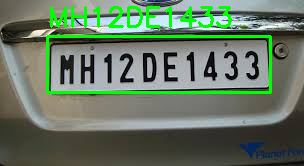

In [ ]:
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow # Import cv2_imshow

model = YOLO("/content/runs/detect/license_plate_yolo/weights/best.pt")

img = cv2.imread("/content/car.jpg")
results = model(img)

for r in results:
    for box in r.boxes:
        x1,y1,x2,y2 = map(int, box.xyxy[0])
        plate = img[y1:y2, x1:x2]

        gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255,
            cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        text = pytesseract.image_to_string(
            thresh,
            config="--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
        )

        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.putText(img,text.strip(),(x1,y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2)

print("YOLO + OCR")
cv2_imshow(img)

### YOLO + EasyOCR Code
This code uses YOLO to localize license plates in an image and EasyOCR to recognize the alphanumeric characters from the detected plate regions. EasyOCR provides higher robustness for real-world license plates compared to traditional OCR engines.

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

results = model(img)

for r in results:
    for box in r.boxes:
        x1,y1,x2,y2 = map(int, box.xyxy[0])
        plate = img[y1:y2, x1:x2]

        ocr_result = reader.readtext(plate)
        text = ocr_result[0][1] if ocr_result else "N/A"

        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.putText(img,text,(x1,y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,0,0),2)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
0: 352x640 1 License_Plate, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


## Train Larger YOLO Models (Better Accuracy)

YOLOv8 offers different model sizes where yolov8n prioritizes speed and low resource usage, yolov8s provides a balance between speed and accuracy, and yolov8m delivers higher accuracy at the cost of computational resources. The choice depends on hardware availability and application requirements.
| Model   | Speed | Accuracy | GPU Required |
| ------- | ----- | -------- | ------------ |
| yolov8n | ⭐⭐⭐⭐  | ⭐⭐       | Low          |
| yolov8s | ⭐⭐⭐   | ⭐⭐⭐⭐     | Medium       |
| yolov8m | ⭐⭐    | ⭐⭐⭐⭐⭐    | High         |


### Train YOLOv8-Small

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="/content/License-Plate-Recognition-11/data.yaml",
    epochs=15,
    imgsz=640,
    batch=16,
    name="license_plate_yolov8s"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=license_plate_yolov8s4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d33040acf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Train YOLOv8-Medium (Best Accuracy)

In [ ]:
model = YOLO("yolov8m.pt")

model.train(
    data="/content/License-Plate-Recognition-11/data.yaml",
    epochs=15,
    imgsz=640,
    batch=8,
    name="license_plate_yolov8m"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=license_plate_yolov8m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79d4cf5e0830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 